## Descripció de  les dades

En aquest segona part analitzarem en detall el contingut de les dades de les columnes, els seus valors estadístics descriptius i es faran diferents visualitzacions.  
A més de seguir aprofondint en el coneixent de les dades es decidrà si és escaient fer algun tipus de tractament als outliers en cas d'existir.

In [3]:
#Llegim el fitxer amb les dades preparades i el carreguem en un dataframe
import numpy as np
import pandas as pd

fitxer="D:/Users/X/Downloads/smoking_drinking_dataset.csv"
df=pd.read_csv(fitxer,encoding='utf-8',sep=',')
df.head()

,genere,edat,alcada,pes,cintura,visio_esquerra,visio_dreta,oide_esquerra_num,oide_dret_num,PAS,...,transaminasa_AST,transaminasa_ALT,transferasa_GGT,nivell_fumador_num,bevedor,nivell_fumador,oide_esquerra,oide_dret,genere_num,bevedor_num
0,Home,35,170,75,90.0,1.0,1.0,1,1,120.0,...,21.0,35.0,40.0,1,Si,No fumador,Normal,Normal,1,1
1,Home,30,180,80,89.0,0.9,1.2,1,1,130.0,...,20.0,36.0,27.0,3,No,Fumador,Normal,Normal,1,0
2,Home,40,165,75,91.0,1.2,1.5,1,1,120.0,...,47.0,32.0,68.0,1,No,No fumador,Normal,Normal,1,0
3,Home,50,175,80,91.0,1.5,1.2,1,1,145.0,...,29.0,34.0,18.0,1,No,No fumador,Normal,Normal,1,0
4,Home,50,165,60,80.0,1.0,1.2,1,1,138.0,...,19.0,12.0,25.0,1,No,No fumador,Normal,Normal,1,0


<B>Estadistica descriptiva del dataframe</B>

In [4]:
df.describe().T
#Hi han atributs en els que els valor màxim i mínim s'allunyen molt del tercer i segon quartil respectivament.
#Això podria ser indicatiu de la presencia de outliers, pero ho veurem en un análisi detallat de cadascun dels
#atributs

,count,mean,std,min,25%,50%,75%,max
edat,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
alcada,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
pes,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
cintura,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
visio_esquerra,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
visio_dreta,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
oide_esquerra_num,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
oide_dret_num,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
PAS,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
PAD,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


<B>Test de normalitat de les dades</B>    
  
Encara que no sigui estrictament necessari disposar de dades amb una distribució normal convé saber-ho per saber quines tècniques podem aplicar o en tot cas quin risc correm al aplicar-les sobre dades no normals, i quines consideracions hem de tenir a l'hora d'interpretar resultats i extreure'n conclusions

In [6]:
from scipy.stats import shapiro

import warnings
warnings.simplefilter('ignore')

#eliminem les columnes no numeriques
df_aux=df.drop(['genere','nivell_fumador','bevedor','oide_esquerra','oide_dret'],axis=1)
#print(df.columns)
llista_columnes=df_aux.columns


files=6
columnes=4
i=0
j=0
for c in llista_columnes:
    print('----' + c +'-----')
    #x=df_aux[c].tolist()
    x=df_aux[c].to_numpy()
    stat, p = shapiro(x)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('p>Alfa: No podem rebutjar H0: Probablement la distribució és normal')
    else:
        print('p<=Alfa: Rebutjem H0: Probablement la distribució no és normal')
    j=j+1
    if j>=columnes:
        j=0
        i=i+1

warnings.resetwarnings()

----edat-----
stat=0.974, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
----alcada-----
stat=0.976, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
----pes-----
stat=0.964, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
----cintura-----
stat=0.682, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
----visio_esquerra-----
stat=0.469, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
----visio_dreta-----
stat=0.469, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
----oide_esquerra_num-----
stat=0.165, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
----oide_dret_num-----
stat=0.161, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
----PAS-----
stat=0.983, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal
----PAD-----
stat=0.987, p=0.000
p<=Alfa: Rebutjem H0: Probablement la distribució no

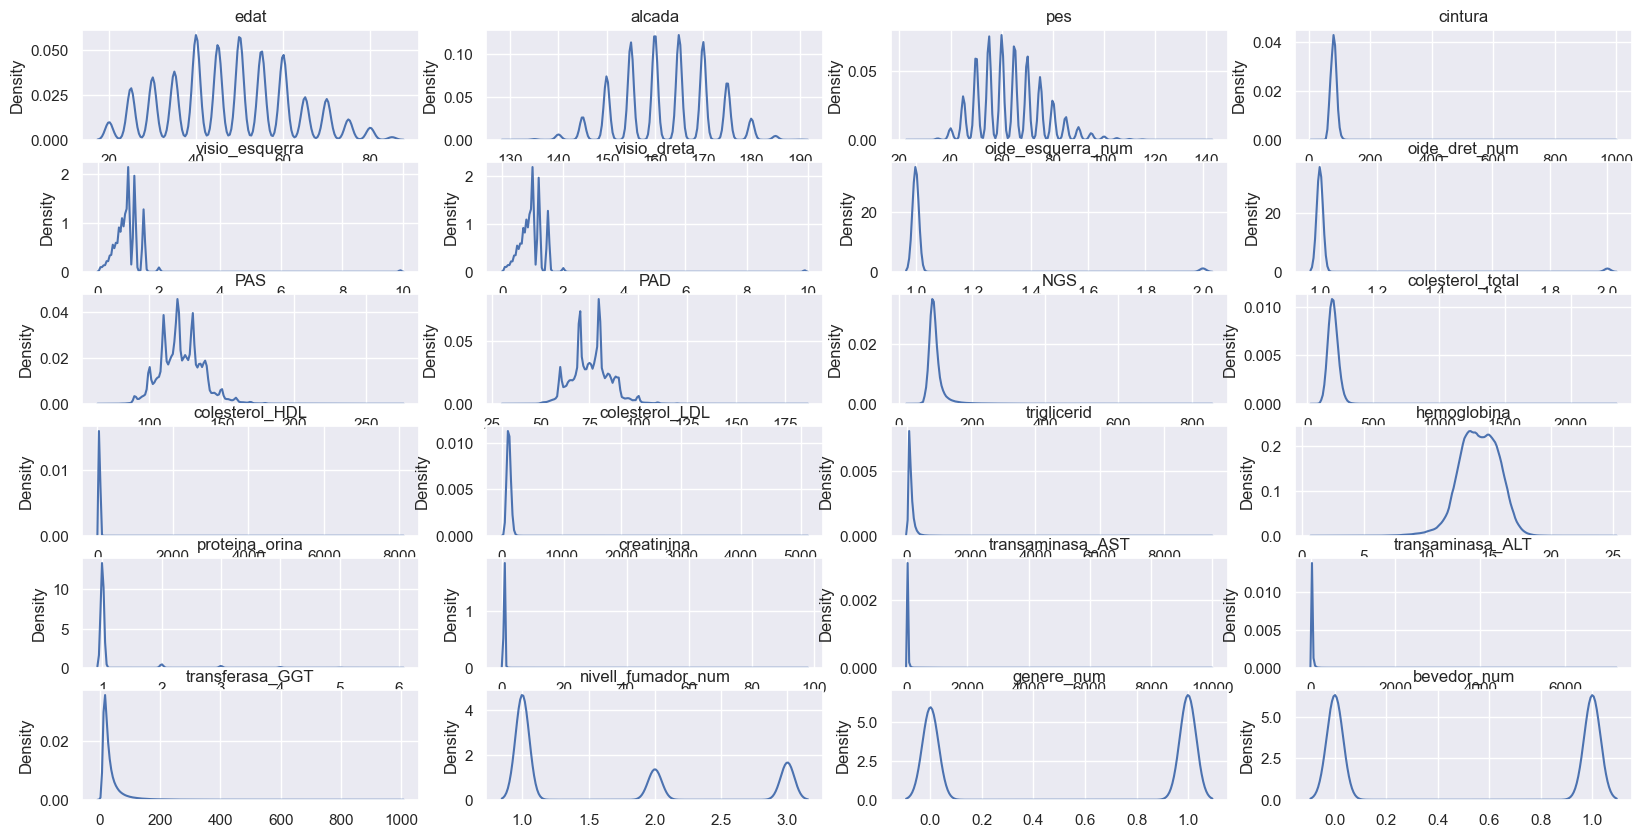

In [7]:
# Ja sabem que no passen el test de normalitat de Saphiro, però observem gràficament 
# la forma de la distribució de les nostres dades

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
#warnings.simplefilter('ignore')


sns.set_theme()

#print(df.columns)
llista_columnes=df_aux.columns
#print(llista_columnes)

files=6
columnes=4
fig, axes = plt.subplots(files, columnes, figsize=(20, 10))
i=0
j=0
for c in llista_columnes:
    x=df_aux[c].tolist()
    #sns.histplot(ax=axes[i,j],data=x,bins=10)
    sns.kdeplot(ax=axes[i,j],x=x)
    #sns.boxplot(ax=axes[i,j],x=x)
    axes[i,j].set_title(c)
    j=j+1
    if j>=columnes:
        j=0
        i=i+1

#warnings.resetwarnings()

<B>Estudi dels atributs</B>  
  
Passem a analitzar cadascun dels atribuits de forma indvidualitzada per acabar de conèixer el seu significat, el rang de valors en que es mou i decidir si és convenient fer algun tratament als outliers.

In [8]:
#Funcio que ens servirà per identificar outliers i decidir el tratament que hi fem
#considerem ouliers aquells valors que es situen per sobre o sota de 1.5 vegades
#l'espai interquatil IQR

#En els casos que he considerat conveneient el·liminar els outliers el tractament que faig
#és asignar-los el valor del quartil més proper

def busca_outliers(serie):
    q1=serie.quantile(0.25)
    q3=serie.quantile(0.75)
    IQR=q3-q1
    outliers = serie[((serie<(q1-1.5*IQR)) | (serie>(q3+1.5*IQR)))].sort_values()
    max=q3+1.5*IQR
    min=q1-1.5*IQR
    return outliers,max,min

Home    526415
Dona    464931
Name: genere, dtype: int64
count     991346
unique         2
top         Home
freq      526415
Name: genere, dtype: object
1    526415
0    464931
Name: genere_num, dtype: int64


<Axes: xlabel='genere', ylabel='Count'>

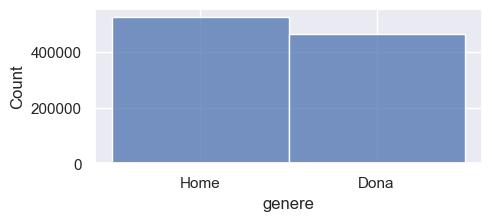

In [9]:
#genere/genere_num
#Variable categòrica (1 - home, 0 - dona)
#La distribució d'obervacions per cada valor és equilibrada
print(df['genere'].value_counts())
print(df['genere'].describe())

print(df['genere_num'].value_counts())

plt.figure(figsize=(5,2))
sns.histplot(df['genere'])
#no fem canvis

count    991346.000000
mean         47.614491
std          14.181339
min          20.000000
25%          35.000000
50%          45.000000
75%          60.000000
max          85.000000
Name: edat, dtype: float64
20     21971
25     64370
30     77600
35     84726
40    130385
45    118355
50    129434
55    111223
60    106063
65     52961
70     50666
75     25333
80     14968
85      3291
Name: edat, dtype: int64
Outliers:
 Series([], Name: edat, dtype: int64)
valor màxim: 97.5
valor mínim: -2.5


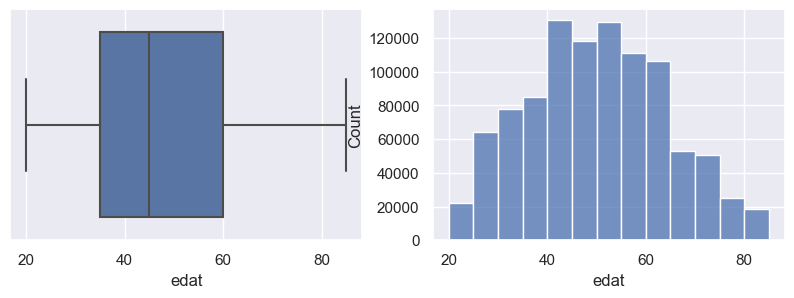

In [10]:
#edat
#variable numèrica discretitzada en múltiples de 5 anys
#La majoria de les mostres està entre 40 i 60 anys
print(df['edat'].describe())
print(df['edat'].sort_values().value_counts(sort=False))
#plt.figure(figsize=(5,0.5))
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
sns.boxplot(x=df['edat'],ax=axes[0])
sns.histplot(x=df['edat'],ax=axes[1],binwidth=5)
outliers,max,min=busca_outliers(df['edat'])
print('Outliers:\n',outliers)
print('valor màxim:',max)
print('valor mínim:',min)
#no fem canvis

count    991346.000000
mean        162.240625
std           9.282957
min         130.000000
25%         155.000000
50%         160.000000
75%         170.000000
max         190.000000
Name: alcada, dtype: float64
130        86
135      1241
140      9100
145     39176
150    107929
155    165678
160    181809
165    178228
170    166328
175     98850
180     35970
185      6588
190       363
Name: alcada, dtype: int64
Outliers:
 29250     130
694919    130
694695    130
688508    130
671741    130
         ... 
315425    130
281821    130
272389    130
386771    130
936627    130
Name: alcada, Length: 86, dtype: int64
valor màxim: 192.5
valor mínim: 132.5


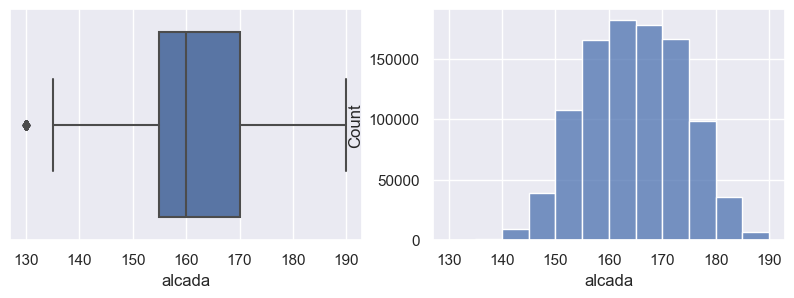

In [11]:
#alcada
#variable numèrica discretitzada en múltiples de 5cm
print(df['alcada'].describe())
print(df['alcada'].sort_values().value_counts(sort=False))
#plt.figure(figsize=(5,0.5))
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
sns.boxplot(x=df['alcada'],ax=axes[0])
sns.histplot(x=df['alcada'],ax=axes[1],binwidth=5)
outliers,max,min=busca_outliers(df['alcada'])
print('Outliers:\n',outliers)
print('valor màxim:',max)
print('valor mínim:',min)
#no fem canvis

count    991346.000000
mean         63.284050
std          12.514241
min          25.000000
25%          55.000000
50%          60.000000
75%          70.000000
max         140.000000
Name: pes, dtype: float64
25          9
30        157
35       1948
40      16639
45      63047
50     125079
55     150415
60     151134
65     141241
70     122281
75      90207
80      58176
85      33708
90      18250
95       9655
100      4829
105      2454
110      1177
115       573
120       236
125        80
130        43
135         5
140         3
Name: pes, dtype: int64
Outliers:
 88731      25
713967     25
317919     25
711682     25
788706     25
         ... 
151251    135
713387    135
778855    140
797726    140
42627     140
Name: pes, Length: 19221, dtype: int64
valor màxim: 92.5
valor mínim: 32.5


<Figure size 500x50 with 0 Axes>

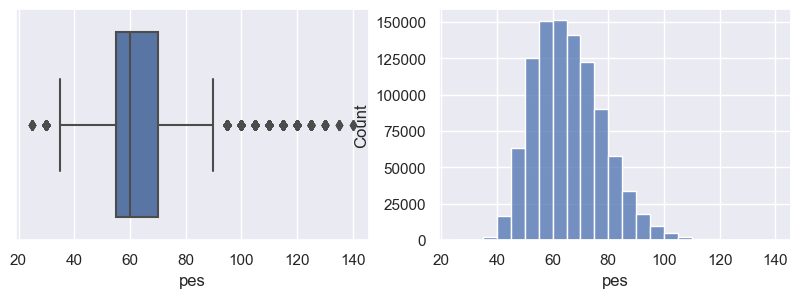

In [12]:
#pes
#variable numèrica discretitzada en múltiples de 5kg
print(df['pes'].describe())
print(df['pes'].sort_values().value_counts(sort=False))
plt.figure(figsize=(5,0.5))
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
sns.boxplot(x=df['pes'],ax=axes[0])
sns.histplot(x=df['pes'],ax=axes[1],binwidth=5)
outliers,max,min=busca_outliers(df['pes'])
print('Outliers:\n',outliers)
print('valor màxim:',max)
print('valor mínim:',min)
#no fem canvis

count    991346.000000
mean         81.233358
std          11.850323
min           8.000000
25%          74.100000
50%          81.000000
75%          87.800000
max         999.000000
Name: cintura, dtype: float64
Outliers:
 796004      8.0
199809     27.0
530395     30.0
761712     30.0
401357     32.0
          ...  
169506    999.0
176101    999.0
967443    999.0
670086    999.0
590781    999.0
Name: cintura, Length: 4417, dtype: float64
valor màxim: 108.35
valor mínim: 53.54999999999999


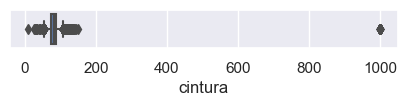

In [13]:
#cintura
#variable numèrica
print(df['cintura'].describe())
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['cintura'])
outliers,max,min=busca_outliers(df['cintura'])
print('Outliers:\n',outliers)
print('valor màxim:',max)
print('valor mínim:',min)


<Axes: xlabel='cintura'>

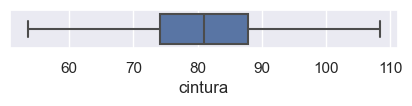

In [14]:
#Modifiquem valor de files amb outliers
#Veiem que hi han valor extrem que podem distorsionar els análisis
#Decideixo redefinir aquest valors extrems
df.loc[df.cintura<min,'cintura']=min
df.loc[df.cintura>max,'cintura']=max
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['cintura'])


count    991346.000000
mean          0.980834
std           0.605949
min           0.100000
25%           0.700000
50%           1.000000
75%           1.200000
max           9.900000
Name: visio_esquerra, dtype: float64
Outliers:
 489962    2.0
603865    2.0
603915    2.0
604027    2.0
604209    2.0
         ... 
673151    9.9
673249    9.9
224316    9.9
670965    9.9
76        9.9
Name: visio_esquerra, Length: 11582, dtype: float64
valor màxim: 1.95
valor mínim: -0.050000000000000044


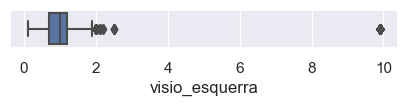

In [15]:
#visio_esquerra
#variable numèrica
print(df['visio_esquerra'].describe())
fig, ax = plt.subplots(figsize = (5, 0.5))
sns.boxplot(x=df['visio_esquerra'])
outliers,max,min=busca_outliers(df['visio_esquerra'])
print('Outliers:\n',outliers)
print('valor màxim:',max)
print('valor mínim:',min)


<Axes: xlabel='visio_esquerra'>

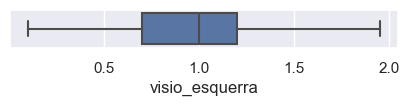

In [16]:
#Modifiquem valor de files amb outliers
#veiem que hi han valor extrem que podem distorsionar els análisis
#Decideixo redefinir aquest valors extrems
df.loc[df.visio_esquerra<min,'visio_esquerra']=min
df.loc[df.visio_esquerra>max,'visio_esquerra']=max
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['visio_esquerra'])


count    991346.000000
mean          0.978429
std           0.604774
min           0.100000
25%           0.700000
50%           1.000000
75%           1.200000
max           9.900000
Name: visio_dreta, dtype: float64
Outliers:
 500408    2.0
608819    2.0
608810    2.0
608748    2.0
608581    2.0
         ... 
230298    9.9
665618    9.9
229928    9.9
231146    9.9
11        9.9
Name: visio_dreta, Length: 10495, dtype: float64


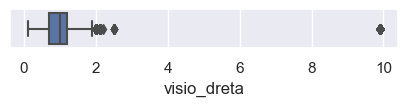

In [17]:
#visio_dreta
#variable numèrica
print(df['visio_dreta'].describe())
fig, ax = plt.subplots(figsize = (5, 0.5))
sns.boxplot(x=df['visio_dreta'])
outliers,max,min=busca_outliers(df['visio_dreta'])
print('Outliers:\n',outliers)


<Axes: xlabel='visio_dreta'>

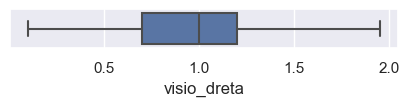

In [18]:
#Modifiquem valor de files amb outliers
#veiem que hi han valor extrem que podem distorsionar els análisis
#Decideixo redefinir aquest valors extrems
df.loc[df.visio_dreta<min,'visio_dreta']=min
df.loc[df.visio_dreta>max,'visio_dreta']=max
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['visio_dreta'])

Normal       960124
No normal     31222
Name: oide_esquerra, dtype: int64
count     991346
unique         2
top       Normal
freq      960124
Name: oide_esquerra, dtype: object


<Axes: xlabel='oide_esquerra', ylabel='Count'>

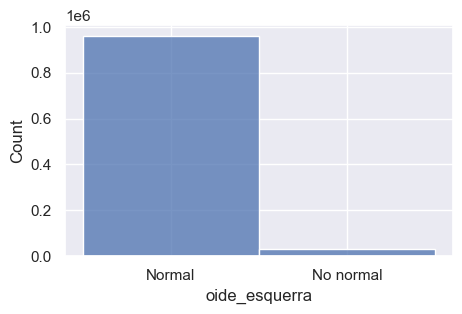

In [19]:
#oide_esquerra/oide_esquerra_num
#variable categorica (1-normal; 2-anormal)
#La gran majoria de les mostres presenten un valor normal en aquesta característica
print(df['oide_esquerra'].value_counts())
print(df['oide_esquerra'].describe())
#fig, ax = plt.subplots(figsize = (5, 0.5))
fig, ax = plt.subplots(figsize = (5, 3))
sns.histplot(x=df['oide_esquerra'])
#no fem res


count     991346
unique         2
top       Normal
freq      961134
Name: oide_dret, dtype: object
Normal       961134
No normal     30212
Name: oide_dret, dtype: int64


<Axes: xlabel='oide_dret', ylabel='Count'>

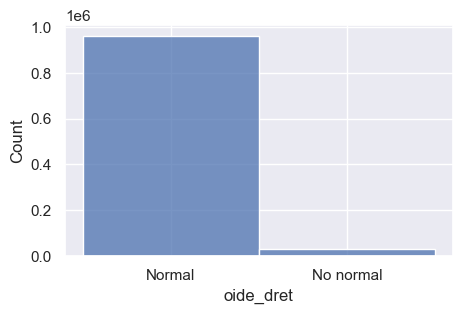

In [20]:
#oide_dret/oide_dret_num
#variable categorica (1-normal; 2-anormal)
#La gran majoria de les mostres presenten un valor normal en aquesta característica
print(df['oide_dret'].describe())
#fig, ax = plt.subplots(figsize = (5, 0.5))
fig, ax = plt.subplots(figsize = (5, 3))
print(df['oide_dret'].value_counts())
sns.histplot(x=df['oide_dret'])
#no fem res


count    991346.000000
mean        122.432498
std          14.543148
min          67.000000
25%         112.000000
50%         120.000000
75%         131.000000
max         273.000000
Name: PAS, dtype: float64
min: 83.5
max: 159.5
Outliers:
 916028     67.0
802463     70.0
606455     70.0
247596     70.0
208087     72.0
          ...  
548052    244.0
531969    253.0
361401    255.0
344956    270.0
893815    273.0
Name: PAS, Length: 15836, dtype: float64


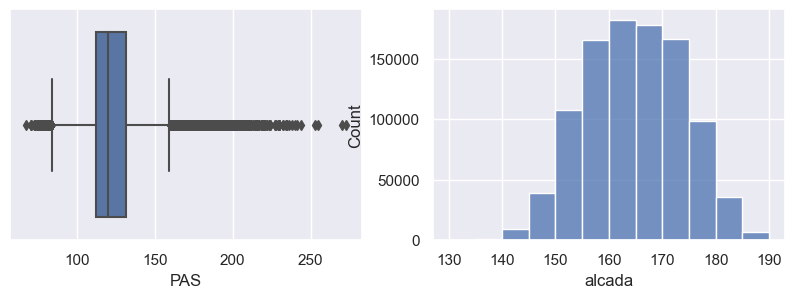

In [21]:
#PAS - Presió Arterial Sistólica
#variable numèrica
print(df['PAS'].describe())
#fig, ax = plt.subplots(figsize = (5, 0.5))
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
sns.boxplot(x=df['PAS'],ax=axes[0])
sns.histplot(x=df['alcada'],ax=axes[1],binwidth=5)
outliers,max,min=busca_outliers(df['PAS'])
print('min:',min)
print('max:',max)
print('Outliers:\n',outliers)
#no fem res

count    991346.000000
mean         76.052627
std           9.889365
min          32.000000
25%          70.000000
50%          76.000000
75%          82.000000
max         185.000000
Name: PAD, dtype: float64
min: 52.0
max: 100.0
Outliers:
 916028     32.0
483070     33.0
721877     34.0
778585     36.0
111481     36.0
          ...  
513319    164.0
818142    170.0
733445    180.0
548052    181.0
206206    185.0
Name: PAD, Length: 13122, dtype: float64


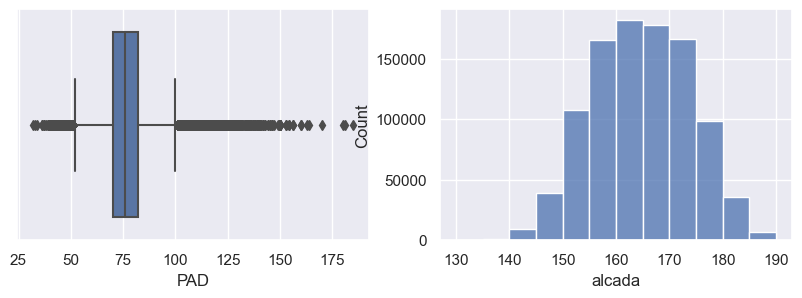

In [22]:
#PAD - Presió Arterial Distólica
#variable numèrica
print(df['PAD'].describe())
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
sns.boxplot(x=df['PAD'],ax=axes[0])
sns.histplot(x=df['alcada'],ax=axes[1],binwidth=5)
outliers,max,min=busca_outliers(df['PAD'])
print('min:',min)
print('max:',max)
print('Outliers:\n',outliers)


count    991346.000000
mean        100.424447
std          24.179960
min          25.000000
25%          88.000000
50%          96.000000
75%         105.000000
max         852.000000
Name: NGS, dtype: float64
min: 62.5
max: 130.5
Outliers:
 904564     25.0
420877     30.0
261761     32.0
506151     33.0
698045     33.0
          ...  
223230    769.0
875767    784.0
665761    800.0
697357    801.0
903167    852.0
Name: NGS, Length: 64202, dtype: float64


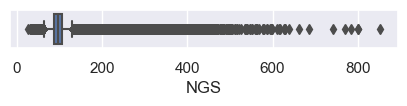

In [23]:
#NGS - Nivell de Glucosa en Sang
#variable numèrica
print(df['NGS'].describe())
fig, ax = plt.subplots(figsize = (5, 0.5))
sns.boxplot(x=df['NGS'])
outliers,max,min=busca_outliers(df['NGS'])
print('min:',min)
print('max:',max)
print('Outliers:\n',outliers)


<Axes: xlabel='NGS'>

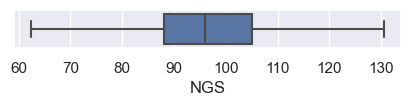

In [24]:
#Modifiquem valor de files amb outliers
#Veiem que hi han valor extrem que podem distorsionar els análisis
#Decideixo redefinir aquest valors extrems
df.loc[df.NGS<min,'NGS']=min
df.loc[df.NGS>max,'NGS']=max
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['NGS'])

count    991346.000000
mean        195.557020
std          38.660155
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: colesterol_total, dtype: float64
min: 94.0
max: 294.0
Outliers:
 634317      30.0
749486      45.0
12544       54.0
781580      55.0
12295       57.0
           ...  
919502    2033.0
398011    2046.0
404588    2067.0
322338    2196.0
811698    2344.0
Name: colesterol_total, Length: 11298, dtype: float64


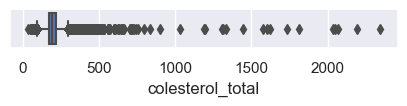

In [25]:
#colesterol_total
#variable numèrica
print(df['colesterol_total'].describe())
fig, ax = plt.subplots(figsize = (5, 0.5))
sns.boxplot(x=df['colesterol_total'])
outliers,max,min=busca_outliers(df['colesterol_total'])
print('min:',min)
print('max:',max)
print('Outliers:\n',outliers)


<Axes: xlabel='colesterol_total'>

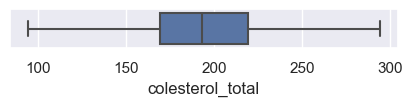

In [26]:
#Modifiquem valor de files amb outliers
#Veiem que hi han valor extrem que podem distorsionar els análisis
#Decideixo redefinir aquest valors extrems
df.loc[df.colesterol_total<min,'colesterol_total']=min
df.loc[df.colesterol_total>max,'colesterol_total']=max
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['colesterol_total'])

count    991346.000000
mean         56.936800
std          17.238479
min           1.000000
25%          46.000000
50%          55.000000
75%          66.000000
max        8110.000000
Name: colesterol_HDL, dtype: float64
min: 16.0
max: 96.0
Outliers:
 398011       1.0
485932       1.0
219620       1.0
715007       2.0
641942       2.0
           ...  
857802     727.0
320962     797.0
813891     933.0
357871    1206.0
7075      8110.0
Name: colesterol_HDL, Length: 13858, dtype: float64


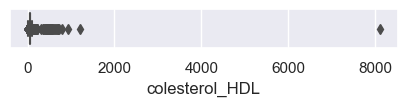

In [27]:
#colesterol_HDL
#variable numèrica
print(df['colesterol_HDL'].describe())
fig, ax = plt.subplots(figsize = (5, 0.5))
sns.boxplot(x=df['colesterol_HDL'])
outliers,max,min=busca_outliers(df['colesterol_HDL'])
print('min:',min)
print('max:',max)
print('Outliers:\n',outliers)


<Axes: xlabel='colesterol_HDL'>

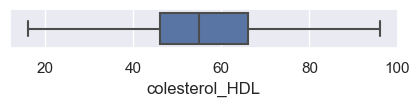

In [28]:
#Modifiquem valor de files amb outliers
#Veiem que hi han valor extrem que podem distorsionar els análisis
#Decideixo redefinir aquest valors extrems
df.loc[df.colesterol_HDL<min,'colesterol_HDL']=min
df.loc[df.colesterol_HDL>max,'colesterol_HDL']=max
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['colesterol_HDL'])


count    991346.000000
mean        113.037692
std          35.842812
min           1.000000
25%          89.000000
50%         111.000000
75%         135.000000
max        5119.000000
Name: colesterol_LDL, dtype: float64
min: 20.0
max: 204.0
Outliers:
 336637       1.0
185093       1.0
257602       1.0
499957       1.0
782604       1.0
           ...  
404588    2043.0
815086    2111.0
322338    2114.0
811698    2254.0
7075      5119.0
Name: colesterol_LDL, Length: 10098, dtype: float64


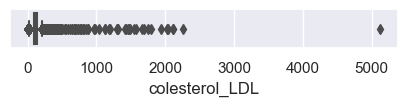

In [29]:
#colesterol_LDL
#variable numèrica
print(df['colesterol_LDL'].describe())
fig, ax = plt.subplots(figsize = (5, 0.5))
sns.boxplot(x=df['colesterol_LDL'])
outliers,max,min=busca_outliers(df['colesterol_LDL'])
print('min:',min)
print('max:',max)
print('Outliers:\n',outliers)


<Axes: xlabel='colesterol_LDL'>

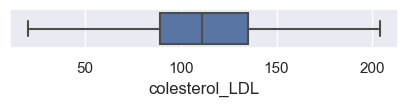

In [30]:
#Modifiquem valor de files amb outliers
#Veiem que hi han valor extrem que podem distorsionar els análisis
#Decideixo redefinir aquest valors extrems
df.loc[df.colesterol_LDL<min,'colesterol_LDL']=min
df.loc[df.colesterol_LDL>max,'colesterol_LDL']=max
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['colesterol_LDL'])

count    991346.000000
mean        132.141751
std         102.196985
min           1.000000
25%          73.000000
50%         106.000000
75%         159.000000
max        9490.000000
Name: triglicerid, dtype: float64
min: -56.0
max: 288.0
Outliers:
 409897     289.0
897557     289.0
28093      289.0
485791     289.0
600624     289.0
           ...  
726009    4164.0
81001     5236.0
220459    6173.0
105334    6430.0
7075      9490.0
Name: triglicerid, Length: 54104, dtype: float64


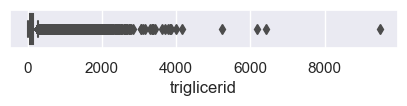

In [31]:
#triglicerid
#variable numèrica
print(df['triglicerid'].describe())
fig, ax = plt.subplots(figsize = (5, 0.5))
sns.boxplot(x=df['triglicerid'])
outliers,max,min=busca_outliers(df['triglicerid'])
print('min:',min)
print('max:',max)
print('Outliers:\n',outliers)


<Axes: xlabel='triglicerid'>

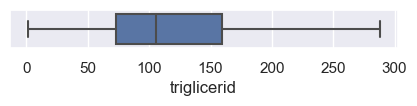

In [32]:
#Modifiquem valor de files amb outliers
#Veiem que hi han valor extrem que podem distorsionar els análisis
#Decideixo redefinir aquest valors extrems
df.loc[df.triglicerid<min,'triglicerid']=min
df.loc[df.triglicerid>max,'triglicerid']=max
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['triglicerid'])


count    991346.000000
mean         14.229824
std           1.584929
min           1.000000
25%          13.200000
50%          14.300000
75%          15.400000
max          25.000000
Name: hemoglobina, dtype: float64
min: 9.899999999999999
max: 18.700000000000003
Outliers:
 438706     1.0
48160      1.0
939749     1.0
674815     2.8
364692     3.7
          ... 
672289    23.6
112413    23.9
200890    24.2
573763    25.0
500112    25.0
Name: hemoglobina, Length: 9760, dtype: float64


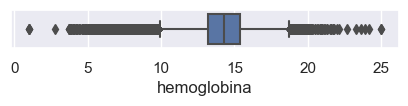

In [33]:
#hemoglobina
#variable numèrica
print(df['hemoglobina'].describe())
fig, ax = plt.subplots(figsize = (5, 0.5))
sns.boxplot(x=df['hemoglobina'])
outliers,max,min=busca_outliers(df['hemoglobina'])
print('min:',min)
print('max:',max)
print('Outliers:\n',outliers)
#no fem res

count    991346.000000
mean          1.094224
std           0.437724
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: proteina_orina, dtype: float64
1    935175
2     30850
3     16405
4      6427
5      1977
6       512
Name: proteina_orina, dtype: int64
Outliers:
 495474    2
410568    2
410548    2
410540    2
410478    2
         ..
593139    6
26309     6
93988     6
468333    6
755142    6
Name: proteina_orina, Length: 56171, dtype: int64


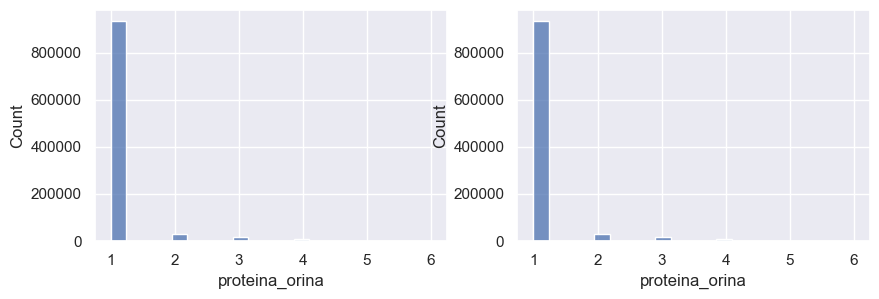

In [34]:
#proteina_orina
#variable categorica 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
#Amb molt diferència, les mostres presenten valor 1 per aquest atribut
print(df['proteina_orina'].describe())
print(df['proteina_orina'].sort_values().value_counts(sort=False))
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
sns.histplot(x=df['proteina_orina'],ax=axes[0])
sns.histplot(x=df['proteina_orina'],ax=axes[1])
outliers,max,min=busca_outliers(df['proteina_orina'])
print('Outliers:\n',outliers)
#no fem res

count    991346.000000
mean          0.860467
std           0.480530
min           0.100000
25%           0.700000
50%           0.800000
75%           1.000000
max          98.000000
Name: creatinina, dtype: float64
min: 0.2499999999999999
max: 1.4500000000000002
Outliers:
 313001     0.1
42546      0.1
851253     0.1
847602     0.1
261731     0.1
          ... 
302439    95.0
646937    96.0
806610    96.0
651519    98.0
803819    98.0
Name: creatinina, Length: 8005, dtype: float64


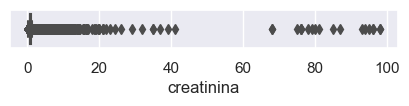

In [35]:
#creatinina (mg/Dl)
#variable numèrica
print(df['creatinina'].describe())
fig, ax = plt.subplots(figsize = (5, 0.5))
sns.boxplot(x=df['creatinina'])
outliers,max,min=busca_outliers(df['creatinina'])
print('min:',min)
print('max:',max)
print('Outliers:\n',outliers)


<Axes: xlabel='creatinina'>

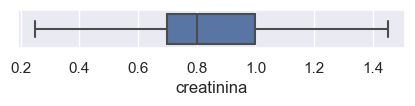

In [36]:
#Modifiquem valor de files amb outliers
#Veiem que hi han valor extrem que podem distorsionar els análisis
#Decideixo redefinir aquest valors extrems
df.loc[df.creatinina<min,'creatinina']=min
df.loc[df.creatinina>max,'creatinina']=max
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['creatinina'])


count    991346.000000
mean         25.989308
std          23.493386
min           1.000000
25%          19.000000
50%          23.000000
75%          28.000000
max        9999.000000
Name: transaminasa_AST, dtype: float64
min: 5.5
max: 41.5
Outliers:
 138255       1.0
52840        1.0
134672       1.0
580386       1.0
435048       1.0
           ...  
524594    3440.0
513400    3742.0
804428    7000.0
642779    7000.0
536962    9999.0
Name: transaminasa_AST, Length: 67614, dtype: float64


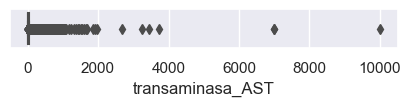

In [37]:
#transaminasa_AST
#variable numèrica
print(df['transaminasa_AST'].describe())
fig, ax = plt.subplots(figsize = (5, 0.5))
sns.boxplot(x=df['transaminasa_AST'])
outliers,max,min=busca_outliers(df['transaminasa_AST'])
print('min:',min)
print('max:',max)
print('Outliers:\n',outliers)


<Axes: xlabel='transaminasa_AST'>

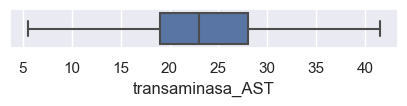

In [38]:
#Modifiquem valor de files amb outliers
#Veiem que hi han valor extrem que podem distorsionar els análisis
#Decideixo redefinir aquest valors extrems
df.loc[df.transaminasa_AST<min,'transaminasa_AST']=min
df.loc[df.transaminasa_AST>max,'transaminasa_AST']=max
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['transaminasa_AST'])


count    991346.000000
mean         25.755051
std          26.308599
min           1.000000
25%          15.000000
50%          20.000000
75%          29.000000
max        7210.000000
Name: transaminasa_ALT, dtype: float64
min: -6.0
max: 50.0
Outliers:
 11          51.0
202492      51.0
722575      51.0
40671       51.0
202635      51.0
           ...  
642779    3307.0
524594    3517.0
804428    3807.0
808591    4633.0
609072    7210.0
Name: transaminasa_ALT, Length: 72928, dtype: float64


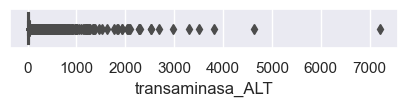

In [39]:
#transaminasa_ALT
#variable numèrica
print(df['transaminasa_ALT'].describe())
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['transaminasa_ALT'])
outliers,max,min=busca_outliers(df['transaminasa_ALT'])
print('min:',min)
print('max:',max)
print('Outliers:\n',outliers)


<Axes: xlabel='transaminasa_ALT'>

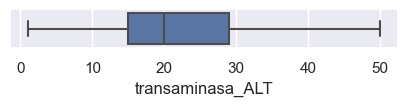

In [40]:
#Modifiquem valor de files amb outliers
#Veiem que hi han valor extrem que podem distorsionar els análisis
#Decideixo redefinir aquest valors extrems
df.loc[df.transaminasa_ALT<min,'transaminasa_ALT']=min
df.loc[df.transaminasa_ALT>max,'transaminasa_ALT']=max
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['transaminasa_ALT'])


count    991346.000000
mean         37.136347
std          50.424153
min           1.000000
25%          16.000000
50%          23.000000
75%          39.000000
max         999.000000
Name: transferasa_GGT, dtype: float64
Outliers:
 64899      74.0
705489     74.0
333066     74.0
704599     74.0
704598     74.0
          ...  
225837    999.0
603845    999.0
794967    999.0
962244    999.0
446857    999.0
Name: transferasa_GGT, Length: 94142, dtype: float64


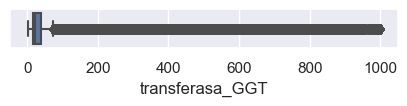

In [41]:
#transferasa_GGT
#variable numèrica
print(df['transferasa_GGT'].describe())
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['transferasa_GGT'])
#sns.scatterplot(x=df.index,y=df['transferasa_GGT'])
outliers,max,min=busca_outliers(df['transferasa_GGT'])
print('Outliers:\n',outliers)


<Axes: xlabel='transferasa_GGT'>

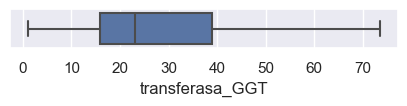

In [42]:
#Modifiquem valor de files amb outliers
#Veiem que hi han valor extrem que podem distorsionar els análisis
#Decideixo redefinir aquest valors extrems
df.loc[df.transferasa_GGT<min,'transferasa_GGT']=min
df.loc[df.transferasa_GGT>max,'transferasa_GGT']=max
plt.figure(figsize=(5,0.5))
sns.boxplot(x=df['transferasa_GGT'])


count         991346
unique             3
top       No fumador
freq          602441
Name: nivell_fumador, dtype: object
ExFumador     174951
Fumador       213954
No fumador    602441
Name: nivell_fumador, dtype: int64


<Axes: xlabel='nivell_fumador', ylabel='Count'>

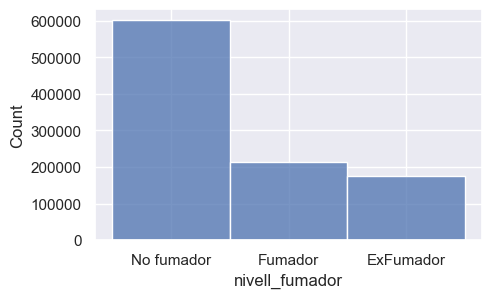

In [43]:
#nivell_fumador/nivell_fumdor_num
#variable categòrica (1-no fumador; 2-exfumador;3-fumador)
print(df['nivell_fumador'].describe())
print(df['nivell_fumador'].sort_values().value_counts(sort=False))
plt.figure(figsize=(5,3))
sns.histplot(x=df['nivell_fumador'])
#no fem res


count     991346
unique         2
top           No
freq      495858
Name: bevedor, dtype: object
No    495858
Si    495488
Name: bevedor, dtype: int64


<Axes: xlabel='bevedor', ylabel='Count'>

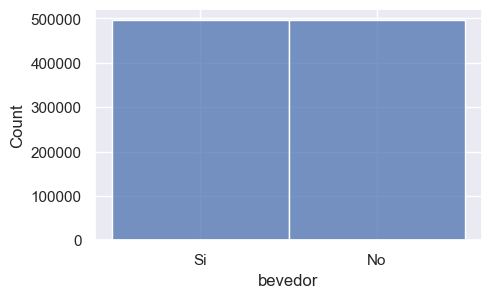

In [44]:
#bevedor/bevedor_num
#variable categòrica ( 1-Si, 0-No)
print(df['bevedor'].describe())
print(df['bevedor'].sort_values().value_counts(sort=False))
plt.figure(figsize=(5,3))
sns.histplot(x=df['bevedor'])
#no fem res

In [45]:
#guardem el fitxer amb les dades preprocessades
fitxer="D:/Users/X/Downloads/smoking_drinking_dataset_pre.csv"
df.to_csv(fitxer,encoding='utf-8',sep=',',index=False)

In [46]:
#Llegim el fitxer amb les dades preprocessades
import numpy as np
import pandas as pd

fitxer="D:/Users/X/Downloads/smoking_drinking_dataset_pre.csv"
df=pd.read_csv(fitxer,encoding='utf-8',sep=',')
df.head()

,genere,edat,alcada,pes,cintura,visio_esquerra,visio_dreta,oide_esquerra_num,oide_dret_num,PAS,...,transaminasa_AST,transaminasa_ALT,transferasa_GGT,nivell_fumador_num,bevedor,nivell_fumador,oide_esquerra,oide_dret,genere_num,bevedor_num
0,Home,35,170,75,90.0,1.0,1.0,1,1,120.0,...,21.0,35.0,40.0,1,Si,No fumador,Normal,Normal,1,1
1,Home,30,180,80,89.0,0.9,1.2,1,1,130.0,...,20.0,36.0,27.0,3,No,Fumador,Normal,Normal,1,0
2,Home,40,165,75,91.0,1.2,1.5,1,1,120.0,...,41.5,32.0,68.0,1,No,No fumador,Normal,Normal,1,0
3,Home,50,175,80,91.0,1.5,1.2,1,1,145.0,...,29.0,34.0,18.0,1,No,No fumador,Normal,Normal,1,0
4,Home,50,165,60,80.0,1.0,1.2,1,1,138.0,...,19.0,12.0,25.0,1,No,No fumador,Normal,Normal,1,0


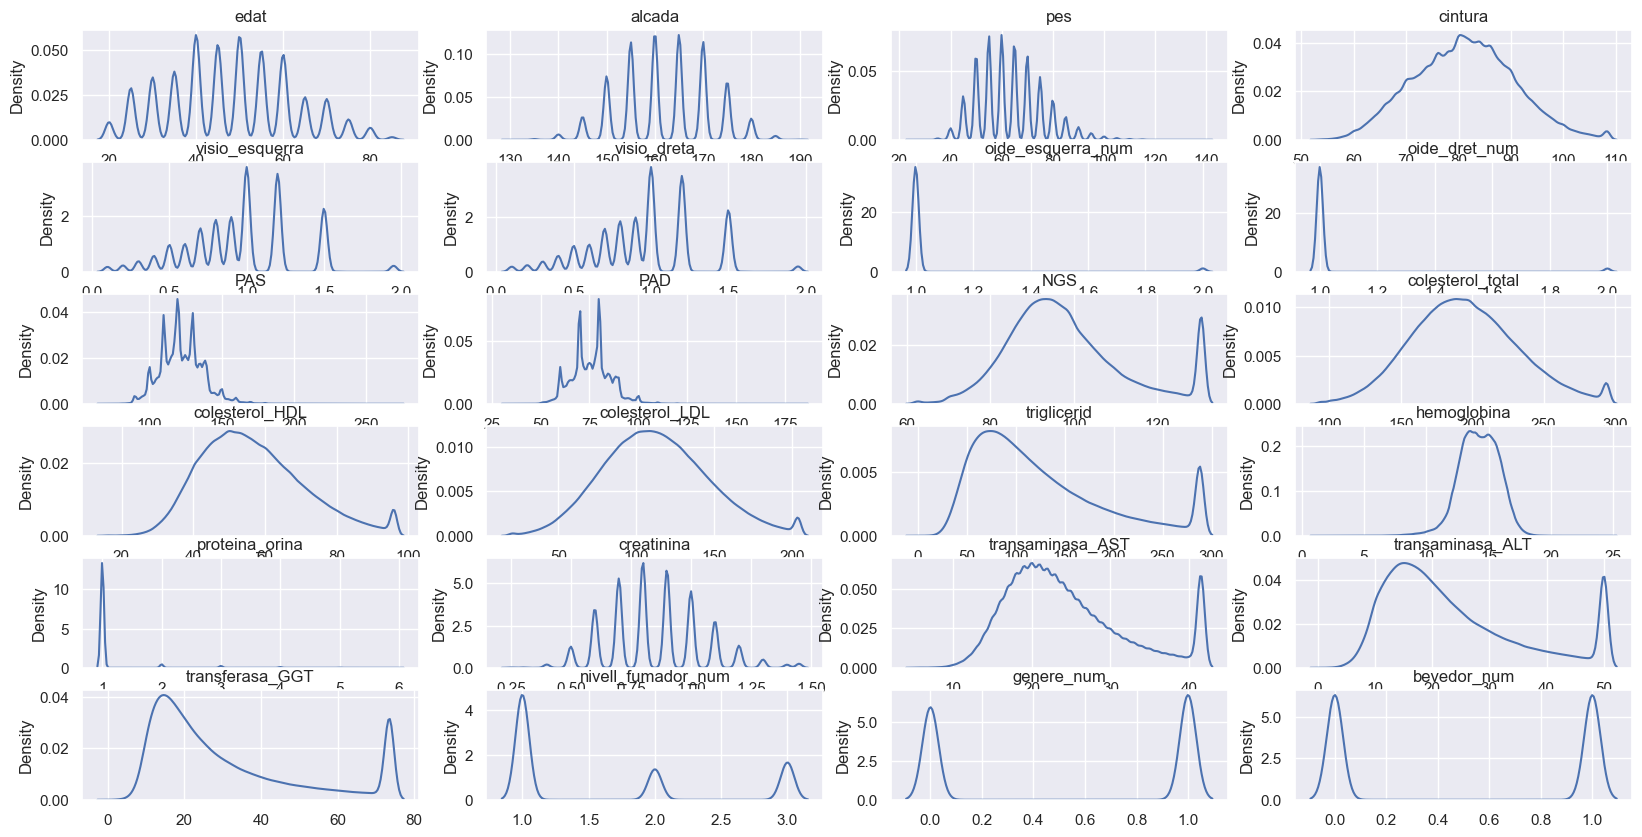

In [48]:
#Tornem a visualitzar les distribucions de cada variable una vegada fetes les modificacions
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')


sns.set_theme()


#eliminem les columnes no numeriques
df_aux=df.drop(['genere','nivell_fumador','bevedor','oide_esquerra','oide_dret'],axis=1)
#print(df.columns)
llista_columnes=df_aux.columns

files=6
columnes=4
fig, axes = plt.subplots(files, columnes, figsize=(20, 10))
i=0
j=0
for c in llista_columnes:
    x=df_aux[c].tolist()
    #sns.histplot(ax=axes[i,j],data=x,bins=10)
    sns.kdeplot(ax=axes[i,j],x=x)
    #sns.boxplot(ax=axes[i,j],x=x)
    axes[i,j].set_title(c)
    j=j+1
    if j>=columnes:
        j=0
        i=i+1

warnings.resetwarnings()